## Import from Scripts

In [1]:
import pandas as pd

from scripts.indicators import (
    add_trend_indicators,
    add_momentum_indicators,
    add_volatility_indicators,
    add_volume_indicators
)

from scripts.plot_utils import plot_price_and_sma


## Load AAPL Data

In [4]:
# Load AAPL historical data
df = pd.read_csv('/home/abel/Downloads/tenx-stock-sentiment-analysis/data/yfinance_data/AAPL_historical_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)


## Apply All Indicators

In [5]:
# Apply all technical indicators using your modular script functions
df = add_trend_indicators(df)
df = add_momentum_indicators(df)
df = add_volatility_indicators(df)
df = add_volume_indicators(df)


## Visualize SMA vs Closing Price

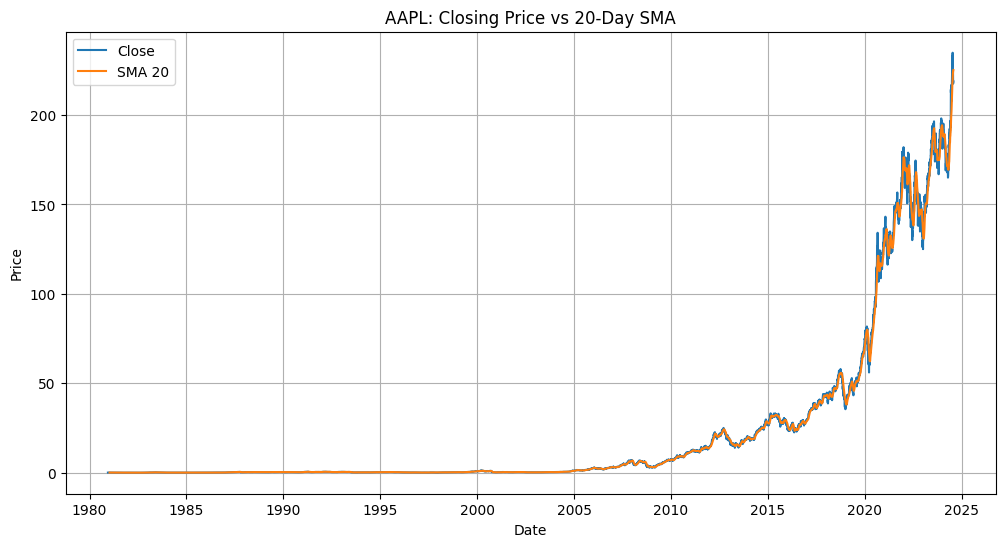

In [6]:
# Plot closing price and SMA
plot_price_and_sma(df, title='AAPL: Closing Price vs 20-Day SMA')
